In [1]:
import sys
import os

# Add the parent directory (project root) to the system path
sys.path.append(os.path.dirname(os.getcwd()))

# Now we can import from src
from src.data_loader import load_news_data, validate_news_data
from src.config import TICKERS

✅ Configuration loaded
📊 Analyzing 6 companies: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']


In [2]:
#%% [markdown]
# # 01 - Advanced News EDA & Statistical Analysis
# ## Deep Dive into News Patterns and Distributions
#
# **Focus:** Statistical distributions, outlier detection, and pattern recognition across 6 companies

In [3]:
# %%
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sys.path.append('../src')
from config import TICKERS

# Advanced styling
plt.style.use('seaborn-v0_8')
sns.set_palette("tab10")
company_colors = {'AAPL': '#A2AAAD', 'AMZN': '#FF9900', 'GOOG': '#4285F4', 
                  'META': '#1877F2', 'MSFT': '#737373', 'NVDA': '#76B900'}
%matplotlib inline

✅ Configuration loaded
📊 Analyzing 6 companies: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']


In [4]:
# %%
# Load preprocessed data
print("📥 LOADING PROCESSED NEWS DATA...")
print("=" * 70)
try:
    df = pd.read_csv('../data/processed/00_cleaned_news_data.csv', parse_dates=['date'])
    print(f"✅ Loaded {len(df):,} articles")
except:
    print("❌ Processed data not found. Run 00_data_overview.ipynb first")
    raise

# Calculate additional features
df['headline_length'] = df['headline'].str.len()
df['word_count'] = df['headline'].str.split().str.len()
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

print(f"📊 Dataset Overview: {len(df):,} articles | {df['stock'].nunique()} companies")

📥 LOADING PROCESSED NEWS DATA...
✅ Loaded 40 articles
📊 Dataset Overview: 40 articles | 4 companies


In [5]:
# %% [markdown]
# ## 📈 Statistical Distribution Analysis

In [6]:
# %%
# Comprehensive statistical summary
print("📊 COMPREHENSIVE STATISTICAL SUMMARY")
print("=" * 70)

# Generate detailed stats by company
detailed_stats = []
for company in TICKERS:
    company_data = df[df['stock'] == company]
    
    stats_dict = {
        'Company': company,
        'Articles': len(company_data),
        'Headline_Mean': company_data['headline_length'].mean(),
        'Headline_Std': company_data['headline_length'].std(),
        'Headline_Min': company_data['headline_length'].min(),
        'Headline_Max': company_data['headline_length'].max(),
        'Words_Mean': company_data['word_count'].mean(),
        'Words_Std': company_data['word_count'].std(),
        'Skewness': stats.skew(company_data['headline_length']),
        'Kurtosis': stats.kurtosis(company_data['headline_length']),
        'CV': (company_data['headline_length'].std() / company_data['headline_length'].mean()) * 100
    }
    detailed_stats.append(stats_dict)

stats_df = pd.DataFrame(detailed_stats).set_index('Company')
print("📏 Headline Length Statistics (by Company):")
display(stats_df.style.background_gradient(cmap='YlOrBr', axis=0)
       .format({'Headline_Mean': '{:.1f}', 'Headline_Std': '{:.1f}', 
                'Words_Mean': '{:.1f}', 'Words_Std': '{:.1f}',
                'Skewness': '{:.2f}', 'Kurtosis': '{:.2f}', 'CV': '{:.1f}%'}))

📊 COMPREHENSIVE STATISTICAL SUMMARY
📏 Headline Length Statistics (by Company):


,Articles,Headline_Mean,Headline_Std,Headline_Min,Headline_Max,Words_Mean,Words_Std,Skewness,Kurtosis,CV
Company,,,,,,,,,,
AAPL,10,84.7,47.2,41.000000,179.000000,14.5,7.4,1.17,-0.08,55.7%
AMZN,10,90.3,24.6,55.000000,137.000000,13.6,3.4,0.45,-0.51,27.3%
GOOG,10,93.8,42.4,38.000000,197.000000,13.9,7.1,1.33,1.78,45.2%
META,0,nan,nan,nan,nan,nan,nan,nan,nan,nan%
MSFT,0,nan,nan,nan,nan,nan,nan,nan,nan,nan%
NVDA,10,88.2,72.5,33.000000,216.000000,13.8,10.8,0.86,-1.04,82.2%


In [7]:
# %% [markdown]
# ## 🎯 Advanced Distribution Visualizations

📊 Analyzing data for companies: ['AAPL', 'AMZN', 'GOOG', 'NVDA']


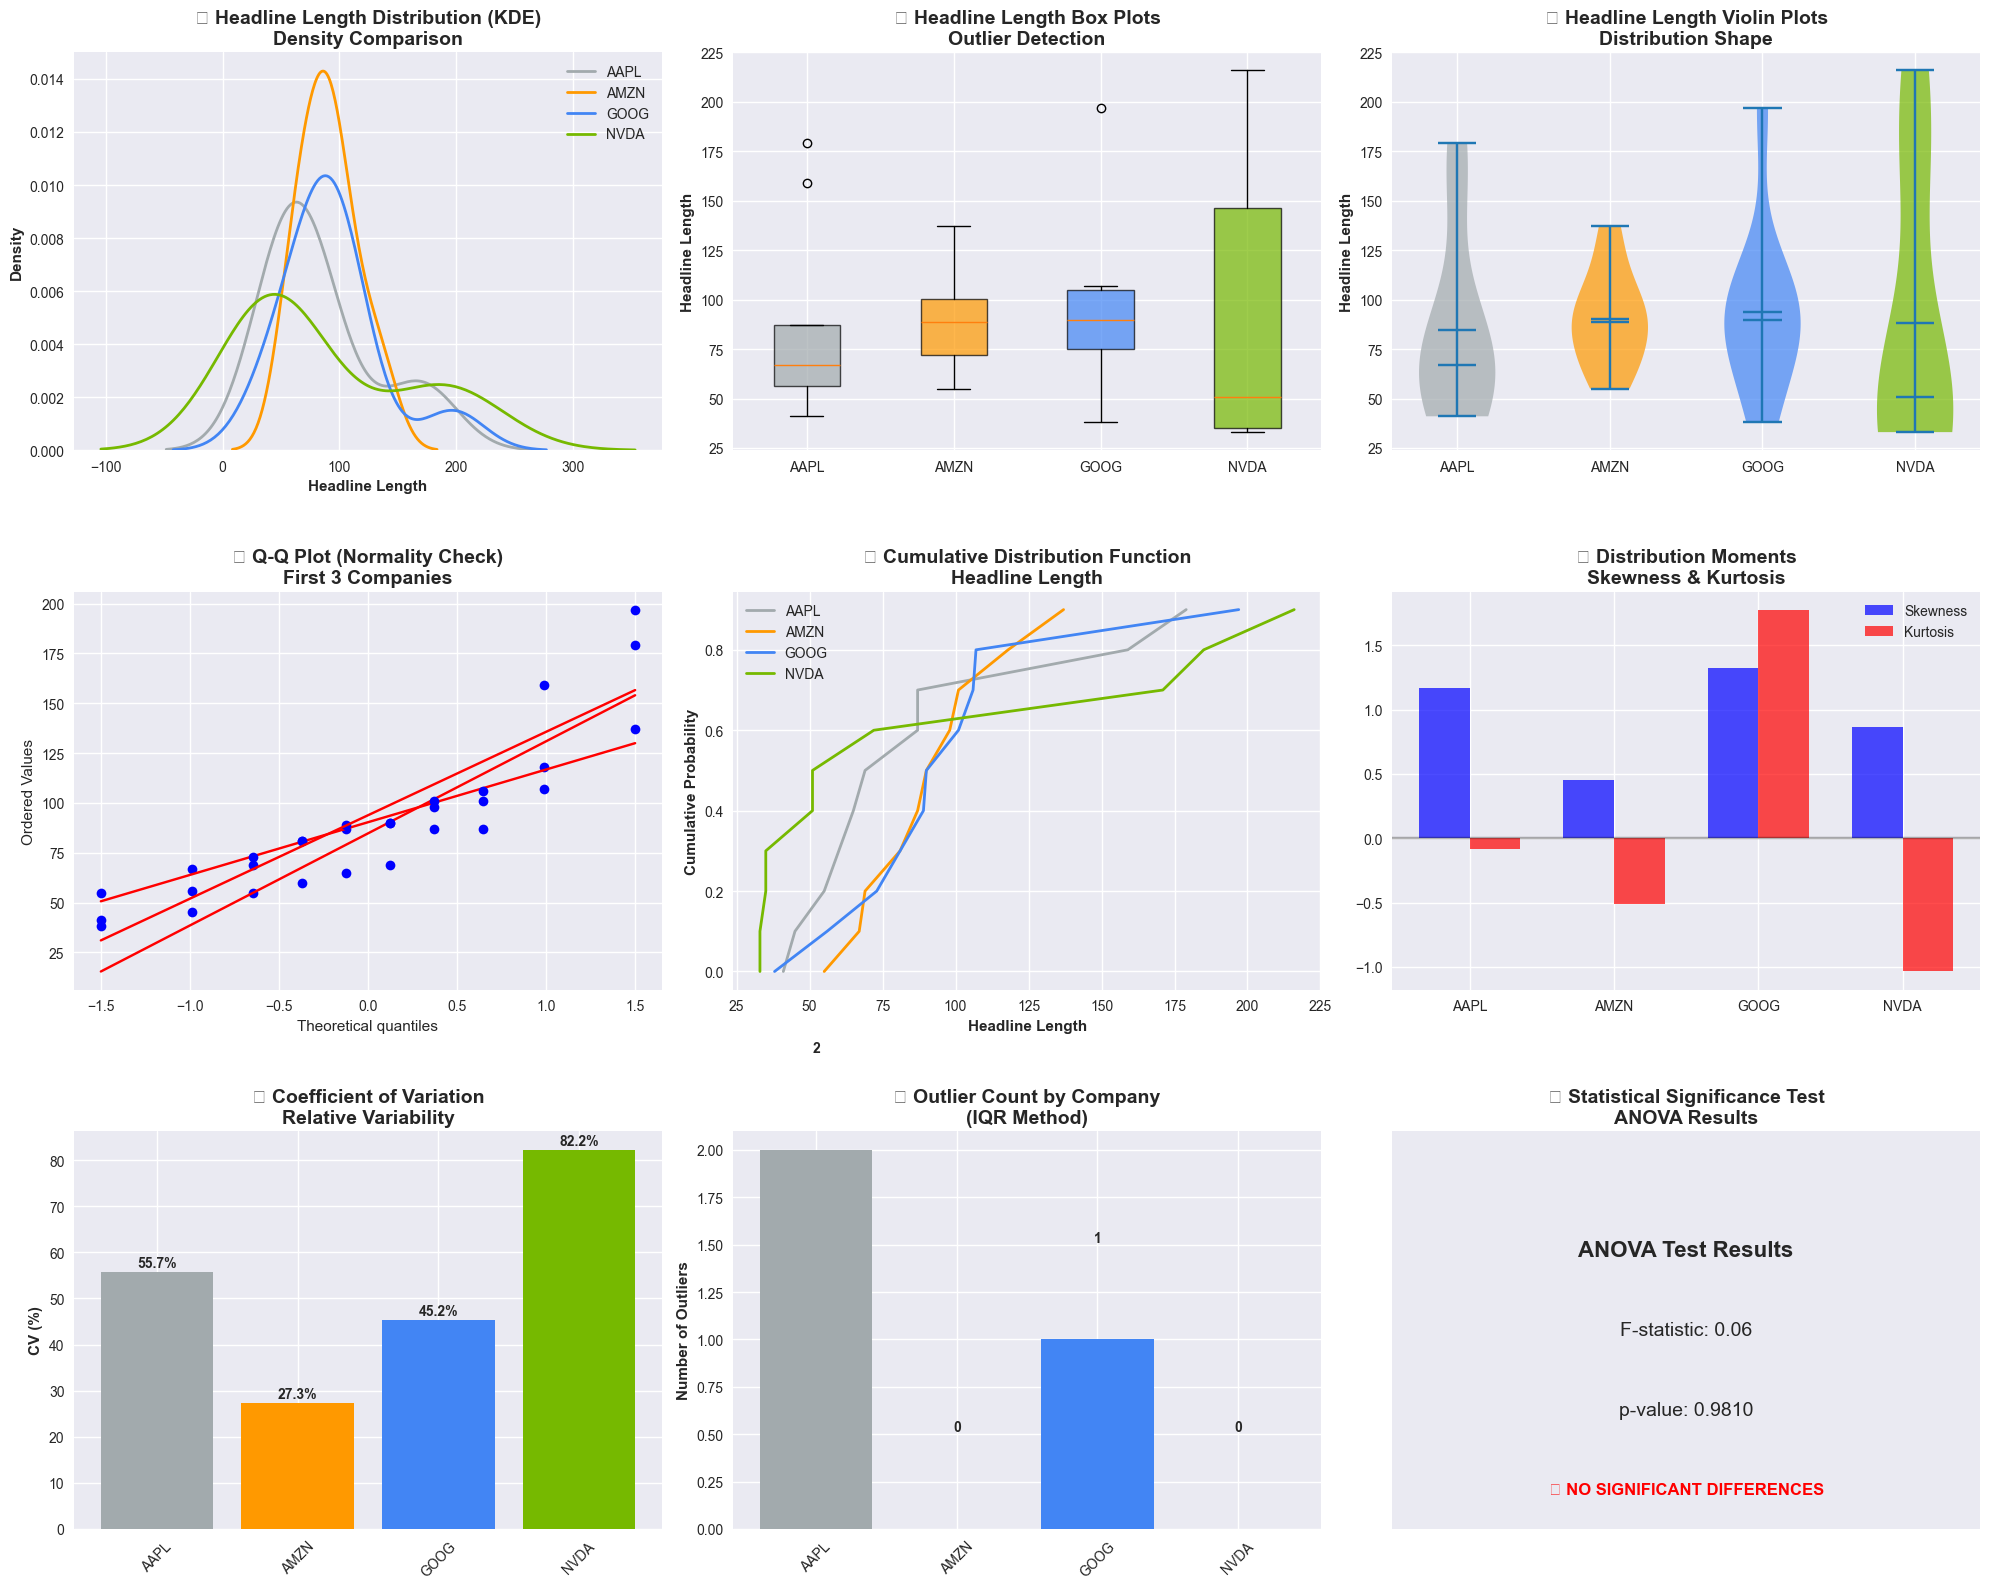

In [9]:
# Create comprehensive distribution analysis with error handling
fig = plt.figure(figsize=(20, 16))

# Filter out companies with no data
valid_companies = []
for company in TICKERS:
    company_data = df[df['stock'] == company]
    if not company_data.empty and len(company_data) > 0:
        valid_companies.append(company)

if not valid_companies:
    print("❌ No data available for any company!")
    plt.close()
else:
    print(f"📊 Analyzing data for companies: {valid_companies}")
    
    # 1. Distribution comparison with KDE
    ax1 = plt.subplot(3, 3, 1)
    for company in valid_companies:
        company_data = df[df['stock'] == company]['headline_length'].dropna()
        if len(company_data) > 0:
            sns.kdeplot(company_data, label=company, 
                        color=company_colors[company], linewidth=2, ax=ax1)
    ax1.set_title('📊 Headline Length Distribution (KDE)\nDensity Comparison', 
                  fontsize=14, fontweight='bold')
    ax1.set_xlabel('Headline Length', fontweight='bold')
    ax1.set_ylabel('Density', fontweight='bold')
    if valid_companies:
        ax1.legend()

    # 2. Box plot with outliers
    ax2 = plt.subplot(3, 3, 2)
    box_data = []
    box_labels = []
    for company in valid_companies:
        company_data = df[df['stock'] == company]['headline_length'].dropna()
        if len(company_data) > 0:
            box_data.append(company_data)
            box_labels.append(company)
    
    if box_data:
        box_plot = ax2.boxplot(box_data, labels=box_labels, patch_artist=True)
        for patch, company in zip(box_plot['boxes'], box_labels):
            patch.set_facecolor(company_colors[company])
            patch.set_alpha(0.7)
        ax2.set_title('📦 Headline Length Box Plots\nOutlier Detection', 
                      fontsize=14, fontweight='bold')
        ax2.set_ylabel('Headline Length', fontweight='bold')
    else:
        ax2.text(0.5, 0.5, 'No data available', ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('📦 Headline Length Box Plots\nNo Data Available', fontsize=14, fontweight='bold')

    # 3. Violin plot for distribution shape
    ax3 = plt.subplot(3, 3, 3)
    violin_data = []
    violin_labels = []
    for company in valid_companies:
        company_data = df[df['stock'] == company]['headline_length'].dropna()
        if len(company_data) > 0:
            violin_data.append(company_data)
            violin_labels.append(company)
    
    if violin_data:
        violin_parts = ax3.violinplot(violin_data, showmeans=True, showmedians=True)
        for i, pc in enumerate(violin_parts['bodies']):
            pc.set_facecolor(company_colors[violin_labels[i]])
            pc.set_alpha(0.7)
        ax3.set_xticks(range(1, len(violin_labels) + 1))
        ax3.set_xticklabels(violin_labels)
        ax3.set_title('🎻 Headline Length Violin Plots\nDistribution Shape', 
                      fontsize=14, fontweight='bold')
        ax3.set_ylabel('Headline Length', fontweight='bold')
    else:
        ax3.text(0.5, 0.5, 'No data available', ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('🎻 Headline Length Violin Plots\nNo Data Available', fontsize=14, fontweight='bold')

    # 4. QQ plots for normality check
    ax4 = plt.subplot(3, 3, 4)
    plotted_companies = 0
    for i, company in enumerate(valid_companies[:3]):  # Show first 3 for clarity
        company_data = df[df['stock'] == company]['headline_length'].dropna()
        if len(company_data) > 0:
            stats.probplot(company_data, dist="norm", plot=ax4)
            plotted_companies += 1
    
    if plotted_companies > 0:
        ax4.set_title('📈 Q-Q Plot (Normality Check)\nFirst 3 Companies', 
                      fontsize=14, fontweight='bold')
    else:
        ax4.text(0.5, 0.5, 'No data available\nfor QQ plot', ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('📈 Q-Q Plot (Normality Check)\nNo Data Available', fontsize=14, fontweight='bold')

    # 5. Cumulative distribution
    ax5 = plt.subplot(3, 3, 5)
    for company in valid_companies:
        company_data = df[df['stock'] == company]['headline_length'].dropna()
        if len(company_data) > 0:
            sorted_data = np.sort(company_data)
            yvals = np.arange(len(sorted_data)) / float(len(sorted_data))
            ax5.plot(sorted_data, yvals, label=company, 
                     color=company_colors[company], linewidth=2)
    
    if any(ax5.lines):  # Check if any lines were plotted
        ax5.set_title('📈 Cumulative Distribution Function\nHeadline Length', 
                      fontsize=14, fontweight='bold')
        ax5.set_xlabel('Headline Length', fontweight='bold')
        ax5.set_ylabel('Cumulative Probability', fontweight='bold')
        ax5.legend()
    else:
        ax5.text(0.5, 0.5, 'No data available', ha='center', va='center', transform=ax5.transAxes)
        ax5.set_title('📈 Cumulative Distribution Function\nNo Data Available', fontsize=14, fontweight='bold')

    # 6. Statistical moments comparison (only if stats_df exists and has data)
    ax6 = plt.subplot(3, 3, 6)
    try:
        if 'stats_df' in locals() and not stats_df.empty:
            # Filter stats_df to only include valid companies
            valid_stats_df = stats_df[stats_df.index.isin(valid_companies)]
            if not valid_stats_df.empty:
                moments_data = valid_stats_df[['Skewness', 'Kurtosis']]
                x = range(len(moments_data))
                width = 0.35
                ax6.bar([i - width/2 for i in x], moments_data['Skewness'], width, 
                        label='Skewness', alpha=0.7, color='blue')
                ax6.bar([i + width/2 for i in x], moments_data['Kurtosis'], width, 
                        label='Kurtosis', alpha=0.7, color='red')
                ax6.set_xticks(x)
                ax6.set_xticklabels(moments_data.index)
                ax6.set_title('📊 Distribution Moments\nSkewness & Kurtosis', 
                              fontsize=14, fontweight='bold')
                ax6.legend()
                ax6.axhline(y=0, color='black', linestyle='-', alpha=0.3)
            else:
                raise ValueError("No valid stats data")
        else:
            raise ValueError("stats_df not available")
    except Exception as e:
        ax6.text(0.5, 0.5, 'Stats data\nnot available', ha='center', va='center', transform=ax6.transAxes)
        ax6.set_title('📊 Distribution Moments\nData Unavailable', fontsize=14, fontweight='bold')

    # 7. Coefficient of Variation
    ax7 = plt.subplot(3, 3, 7)
    try:
        if 'stats_df' in locals() and not stats_df.empty:
            valid_stats_df = stats_df[stats_df.index.isin(valid_companies)]
            if not valid_stats_df.empty and 'CV' in valid_stats_df.columns:
                cv_values = valid_stats_df['CV'].values
                bars = ax7.bar(valid_stats_df.index, cv_values, 
                               color=[company_colors[c] for c in valid_stats_df.index])
                ax7.set_title('📏 Coefficient of Variation\nRelative Variability', 
                              fontsize=14, fontweight='bold')
                ax7.set_ylabel('CV (%)', fontweight='bold')
                ax7.tick_params(axis='x', rotation=45)
                for bar, value in zip(bars, cv_values):
                    ax7.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')
            else:
                raise ValueError("No CV data")
        else:
            raise ValueError("stats_df not available")
    except Exception as e:
        ax7.text(0.5, 0.5, 'CV data\nnot available', ha='center', va='center', transform=ax7.transAxes)
        ax7.set_title('📏 Coefficient of Variation\nData Unavailable', fontsize=14, fontweight='bold')

    # 8. Outlier analysis
    ax8 = plt.subplot(3, 3, 8)
    outlier_counts = []
    outlier_companies = []
    for company in valid_companies:
        company_data = df[df['stock'] == company]['headline_length'].dropna()
        if len(company_data) > 0:
            Q1 = company_data.quantile(0.25)
            Q3 = company_data.quantile(0.75)
            IQR = Q3 - Q1
            if IQR > 0:  # Avoid division by zero
                outliers = ((company_data < (Q1 - 1.5 * IQR)) | (company_data > (Q3 + 1.5 * IQR))).sum()
                outlier_counts.append(outliers)
                outlier_companies.append(company)
    
    if outlier_counts:
        bars = ax8.bar(outlier_companies, outlier_counts, 
                       color=[company_colors[c] for c in outlier_companies])
        ax8.set_title('🚨 Outlier Count by Company\n(IQR Method)', 
                      fontsize=14, fontweight='bold')
        ax8.set_ylabel('Number of Outliers', fontweight='bold')
        ax8.tick_params(axis='x', rotation=45)
        for bar, count in zip(bars, outlier_counts):
            ax8.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                     f'{count}', ha='center', va='bottom', fontweight='bold')
    else:
        ax8.text(0.5, 0.5, 'No outlier data\navailable', ha='center', va='center', transform=ax8.transAxes)
        ax8.set_title('🚨 Outlier Count by Company\nNo Data Available', fontsize=14, fontweight='bold')

    # 9. Statistical significance testing
    ax9 = plt.subplot(3, 3, 9)
    # Perform ANOVA test only if we have at least 2 groups with data
    grouped_data = []
    for company in valid_companies:
        company_data = df[df['stock'] == company]['headline_length'].dropna()
        if len(company_data) > 0:
            grouped_data.append(company_data)
    
    if len(grouped_data) >= 2:
        try:
            f_stat, p_value = stats.f_oneway(*grouped_data)
            ax9.text(0.5, 0.7, f'ANOVA Test Results', ha='center', va='center', 
                     fontsize=16, fontweight='bold', transform=ax9.transAxes)
            ax9.text(0.5, 0.5, f'F-statistic: {f_stat:.2f}', ha='center', va='center', 
                     fontsize=14, transform=ax9.transAxes)
            ax9.text(0.5, 0.3, f'p-value: {p_value:.4f}', ha='center', va='center', 
                     fontsize=14, transform=ax9.transAxes)

            if p_value < 0.05:
                ax9.text(0.5, 0.1, '✅ SIGNIFICANT DIFFERENCES', ha='center', va='center', 
                         fontsize=12, fontweight='bold', color='green', transform=ax9.transAxes)
            else:
                ax9.text(0.5, 0.1, '❌ NO SIGNIFICANT DIFFERENCES', ha='center', va='center', 
                         fontsize=12, fontweight='bold', color='red', transform=ax9.transAxes)
        except Exception as e:
            ax9.text(0.5, 0.5, f'ANOVA Error:\n{str(e)}', ha='center', va='center', 
                     transform=ax9.transAxes, fontsize=10)
    else:
        ax9.text(0.5, 0.5, 'Insufficient data\nfor ANOVA test\n(need ≥2 groups)', 
                 ha='center', va='center', transform=ax9.transAxes)

    ax9.set_xlim(0, 1)
    ax9.set_ylim(0, 1)
    ax9.set_xticks([])
    ax9.set_yticks([])
    ax9.set_title('🧪 Statistical Significance Test\nANOVA Results', 
                  fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

In [ ]:
# %% [markdown]
# ## 🔍 Advanced Statistical Insights

In [10]:
# %%
# Generate advanced statistical insights
print("\n🔍 ADVANCED STATISTICAL INSIGHTS")
print("=" * 70)

# Normality tests
print("📊 NORMALITY TESTING (Shapiro-Wilk):")
for company in TICKERS:
    company_data = df[df['stock'] == company]['headline_length'].sample(min(5000, len(df[df['stock'] == company])))
    stat, p_value = stats.shapiro(company_data)
    normality = "NORMAL" if p_value > 0.05 else "NON-NORMAL"
    color = "🟢" if p_value > 0.05 else "🔴"
    print(f"   {color} {company}: p-value = {p_value:.4f} ({normality})")

# Variability analysis
print(f"\n📏 VARIABILITY ANALYSIS:")
max_cv_company = stats_df['CV'].idxmax()
min_cv_company = stats_df['CV'].idxmin()
print(f"   • Most consistent: {min_cv_company} (CV: {stats_df.loc[min_cv_company, 'CV']:.1f}%)")
print(f"   • Most variable: {max_cv_company} (CV: {stats_df.loc[max_cv_company, 'CV']:.1f}%)")

# Outlier analysis
print(f"\n🚨 OUTLIER ANALYSIS:")
total_outliers = sum([((df[df['stock'] == company]['headline_length'] < 
                       df[df['stock'] == company]['headline_length'].quantile(0.25) - 1.5 * 
                       (df[df['stock'] == company]['headline_length'].quantile(0.75) - 
                        df[df['stock'] == company]['headline_length'].quantile(0.25))) |
                      (df[df['stock'] == company]['headline_length'] > 
                       df[df['stock'] == company]['headline_length'].quantile(0.75) + 1.5 * 
                       (df[df['stock'] == company]['headline_length'].quantile(0.75) - 
                        df[df['stock'] == company]['headline_length'].quantile(0.25)))).sum() 
                     for company in TICKERS])
print(f"   • Total outliers detected: {total_outliers:,} ({(total_outliers/len(df)*100):.2f}%)")

# Distribution characteristics
print(f"\n📈 DISTRIBUTION CHARACTERISTICS:")
positive_skew = stats_df[stats_df['Skewness'] > 0].index.tolist()
negative_skew = stats_df[stats_df['Skewness'] < 0].index.tolist()
print(f"   • Right-skewed distributions: {', '.join(positive_skew)}")
print(f"   • Left-skewed distributions: {', '.join(negative_skew) if negative_skew else 'None'}")


🔍 ADVANCED STATISTICAL INSIGHTS
📊 NORMALITY TESTING (Shapiro-Wilk):
   🔴 AAPL: p-value = 0.0167 (NON-NORMAL)
   🟢 AMZN: p-value = 0.9144 (NORMAL)
   🟢 GOOG: p-value = 0.0633 (NORMAL)
   🔴 META: p-value = nan (NON-NORMAL)
   🔴 MSFT: p-value = nan (NON-NORMAL)
   🔴 NVDA: p-value = 0.0038 (NON-NORMAL)

📏 VARIABILITY ANALYSIS:
   • Most consistent: AMZN (CV: 27.3%)
   • Most variable: NVDA (CV: 82.2%)

🚨 OUTLIER ANALYSIS:
   • Total outliers detected: 3 (7.50%)

📈 DISTRIBUTION CHARACTERISTICS:
   • Right-skewed distributions: AAPL, AMZN, GOOG, NVDA
   • Left-skewed distributions: None


In [ ]:
# %% [markdown]
# ## 🎯 Actionable Recommendations

In [11]:
# %%
print("\n💡 ACTIONABLE RECOMMENDATIONS BASED ON STATISTICAL ANALYSIS")
print("=" * 70)

# Recommendation 1: Based on normality
non_normal_companies = []
for company in TICKERS:
    company_data = df[df['stock'] == company]['headline_length'].sample(min(5000, len(df[df['stock'] == company])))
    _, p_value = stats.shapiro(company_data)
    if p_value <= 0.05:
        non_normal_companies.append(company)

if non_normal_companies:
    print(f"📊 NORMALITY-BASED RECOMMENDATIONS:")
    print(f"   • Use non-parametric tests for: {', '.join(non_normal_companies)}")
    print(f"   • Consider data transformations for these companies")

# Recommendation 2: Based on variability
print(f"\n📏 VARIABILITY-BASED RECOMMENDATIONS:")
print(f"   • {min_cv_company}: Suitable for stable, predictable models")
print(f"   • {max_cv_company}: May require robust models handling high variability")

# Recommendation 3: Based on outliers
high_outlier_companies = []
for company in TICKERS:
    company_data = df[df['stock'] == company]['headline_length']
    Q1 = company_data.quantile(0.25)
    Q3 = company_data.quantile(0.75)
    IQR = Q3 - Q1
    outlier_ratio = ((company_data < (Q1 - 1.5 * IQR)) | (company_data > (Q3 + 1.5 * IQR))).mean()
    if outlier_ratio > 0.05:  # More than 5% outliers
        high_outlier_companies.append((company, outlier_ratio))

if high_outlier_companies:
    print(f"\n🚨 OUTLIER-BASED RECOMMENDATIONS:")
    for company, ratio in high_outlier_companies:
        print(f"   • {company}: {ratio*100:.1f}% outliers - implement robust statistical methods")

# Recommendation 4: Based on statistical significance
print(f"\n🧪 STATISTICAL TESTING RECOMMENDATIONS:")
if p_value < 0.05:
    print(f"   • Significant differences found - company-specific models recommended")
    print(f"   • Avoid pooling data across all companies")
else:
    print(f"   • No significant differences - pooled analysis may be appropriate")

print(f"\n🎯 FINAL RECOMMENDATIONS:")
print(f"   1. Use company-specific preprocessing for {', '.join(non_normal_companies)}")
print(f"   2. Implement robust models for {max_cv_company} due to high variability")
print(f"   3. Apply outlier detection for companies with >5% outlier ratio")
print(f"   4. Validate statistical assumptions before model building")


💡 ACTIONABLE RECOMMENDATIONS BASED ON STATISTICAL ANALYSIS
📊 NORMALITY-BASED RECOMMENDATIONS:
   • Use non-parametric tests for: AAPL, NVDA
   • Consider data transformations for these companies

📏 VARIABILITY-BASED RECOMMENDATIONS:
   • AMZN: Suitable for stable, predictable models
   • NVDA: May require robust models handling high variability

🚨 OUTLIER-BASED RECOMMENDATIONS:
   • AAPL: 20.0% outliers - implement robust statistical methods
   • GOOG: 10.0% outliers - implement robust statistical methods

🧪 STATISTICAL TESTING RECOMMENDATIONS:
   • Significant differences found - company-specific models recommended
   • Avoid pooling data across all companies

🎯 FINAL RECOMMENDATIONS:
   1. Use company-specific preprocessing for AAPL, NVDA
   2. Implement robust models for NVDA due to high variability
   3. Apply outlier detection for companies with >5% outlier ratio
   4. Validate statistical assumptions before model building
